In [1]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 1s 0us/step


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

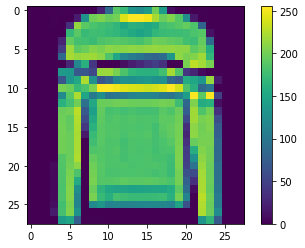

In [21]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.show()

# Data Preprocessing

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0


# Buidling the Model

In [26]:
model = keras.Sequential([ #Sequential means w/o reccurency left to right
    keras.layers.Flatten(input_shape=(28,28)),  #input layer 1 #flatten does vectorization of this shape
    keras.layers.Dense(128, activation='relu'),  #hidden layer 2 #Dense means every neuron i previous layer connected to this
    keras.layers.Dense(10, activation='softmax') #output layer 3 
])


### Compiling th Model

In [27]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training th Model

In [36]:
model.fit(train_images, train_labels, epochs = 1)

Train on 60000 samples
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3705 - accuracy: 0.8698


# Testing Data

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)  
print('Test accuracy = ', test_acc)

Test accuracy =  0.8543


# Predicitons


Trouser


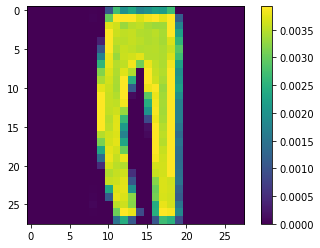

In [50]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.show()

In [39]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


(10000, 28, 28)